In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from mpl_bsic import apply_bsic_logo, apply_bsic_style, export_figure
from src.features_transformations.fractional_differentiation import find_stat_series

0 333
333 666
666 999


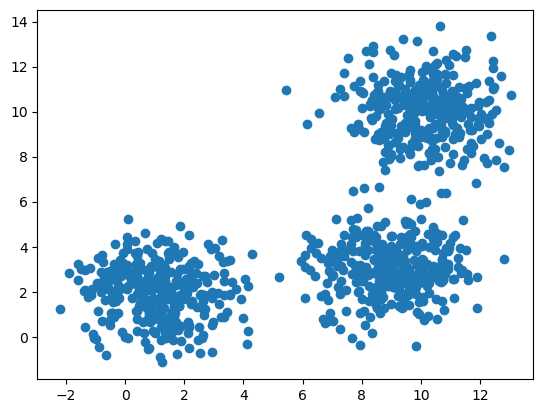

In [6]:
centers = [(1,2), (10, 10), (9,3)]

n = 1000
x = np.zeros(n)
y = np.zeros(n)

indices = np.linspace(0, n - 1, len(centers) + 1, dtype=int)

for i in range(1,len(indices)): 
    i_0, i_1 = indices[i], indices[i-1]
    print(i_1, i_0)

    x[i_1:i_0] = np.random.normal(centers[i-1][0], 1.25, i_0 - i_1)
    y[i_1:i_0] = np.random.normal(centers[i-1][1], 1.25, i_0 - i_1)
p = np.random.permutation(n)
zipped = np.column_stack((x, y))[p]

plt.scatter(x,y)

fonts already added so will not add again


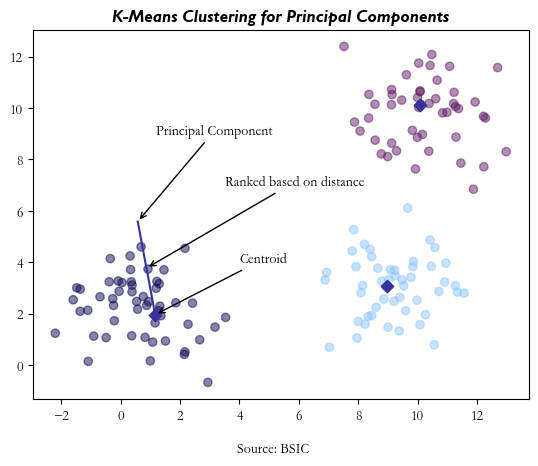

In [7]:
from sklearn.cluster import KMeans

cutoff = int(0.15 * n)

points = zipped[:-cutoff]
new_points = zipped[-cutoff:]

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)
# Fit model to points
model.fit(points)
# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)
colors = ["#601E66", "#0E0B54", "#8EC6FF"]

# Import pyplot
import matplotlib.pyplot as plt
# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

fig, ax = plt.subplots()
ax.set_title('K-Means Clustering for Principal Components')
apply_bsic_style(fig, ax)
apply_bsic_logo(fig, ax)

# Make a scatter plot of xs and ys, using labels to define the colors
ax.scatter(xs,ys,c=[colors[i] for i in labels],alpha=0.5)
# Assign the cluster centers: centroids
centroids = model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# Make a scatter plot of centroids_x and centroids_y
ax.scatter(centroids_x, centroids_y, marker="D", s=40, c="#38329A")

arrowprops = dict(arrowstyle="->")
centroid_highlighted = centroids[centroids[:, 0] < 2][0]
point_highlighted = [0.57704335, 5.58239809]
linex = (point_highlighted[0], centroid_highlighted[0])
liney = (point_highlighted[1], centroid_highlighted[1])
midpoint = ((linex[0] + linex[1]) / 2, (liney[0] + liney[1]) / 2)

ax.annotate(
    "Principal Component",
    xy=point_highlighted,
    xytext=(1.2, 9),
    arrowprops=arrowprops,
)

ax.annotate(
    "Centroid", 
    xy=centroid_highlighted,
    xytext=(4,4),
    arrowprops=arrowprops,
)

ax.annotate(
    "Ranked based on distance", 
    xy=midpoint,
    xytext=(3.5,7),
    arrowprops=arrowprops,
)

plt.plot(linex, liney)
plt.show()

export_figure(fig, 'test')